In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Retail_Transactions_2000.csv')

In [3]:
df.shape

(2000, 11)

In [4]:
df.columns

Index(['TransactionID', 'CustomerID', 'Gender', 'Age', 'City',
       'ProductCategory', 'Quantity', 'Price', 'PurchaseDate', 'PaymentMode',
       'TotalAmount'],
      dtype='object')

In [5]:
df.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123


In [6]:
df.tail()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
1995,T01996,C1151,Male,44,Jaipur,Fashion,2,2436,2023-01-15,Wallet,4872
1996,T01997,C5888,Male,53,Ahmedabad,Beauty,3,2744,2023-01-14,Wallet,8232
1997,T01998,C2758,Male,45,Lucknow,Electronics,1,3246,2023-06-19,Wallet,3246
1998,T01999,C6489,Male,43,Bengaluru,Sports,2,2709,2023-01-15,Wallet,5418
1999,T02000,C5662,Male,33,Hyderabad,Beauty,2,1561,2023-08-29,UPI,3122


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TransactionID    2000 non-null   object
 1   CustomerID       2000 non-null   object
 2   Gender           2000 non-null   object
 3   Age              2000 non-null   int64 
 4   City             2000 non-null   object
 5   ProductCategory  2000 non-null   object
 6   Quantity         2000 non-null   int64 
 7   Price            2000 non-null   int64 
 8   PurchaseDate     2000 non-null   object
 9   PaymentMode      2000 non-null   object
 10  TotalAmount      2000 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 172.0+ KB


In [8]:
df.describe()

,Age,Quantity,Price,TotalAmount
count,2000.000000,2000.000000,2000.00000,2000.000000
mean,44.679000,2.957000,2496.61000,7307.414500
std,15.179795,1.412143,1413.95187,5705.065758
min,18.000000,1.000000,100.00000,111.000000
25%,32.000000,2.000000,1239.00000,2756.250000
50%,45.000000,3.000000,2481.50000,5562.500000
75%,58.000000,4.000000,3695.50000,10751.250000
max,70.000000,5.000000,5000.00000,24950.000000


In [9]:
df.isnull().sum()

TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
dtype: int64

In [10]:
df.isna().sum()

TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df['Gender'].value_counts()

Gender
Male      673
Female    664
Other     663
Name: count, dtype: int64

In [13]:
df=df[(df['Quantity']>0)& (df['Price']>0)]

In [14]:
if 'TotalAmount' not in df.columns:
    df['TotalAmount']=df['Quantity']*df['Price']

In [15]:
df['PurchaseDate']=pd.to_datetime(df['PurchaseDate'],errors='coerce')
df['PurchaseMonth']=df['PurchaseDate'].dt.month
df['Day_ofweek']=df['PurchaseDate'].dt.day_name()

In [16]:
bins = [0, 25, 40, 60, 100]
labels = ['18-25', '26-40', '41-60', '60+']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Gender_encode']=encoder.fit_transform(df['Gender'])
df['City_encode']=encoder.fit_transform(df['City'])
df['ProductCategory_encode']=encoder.fit_transform(df['ProductCategory'])

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df['Age']=scaler.fit_transform(df[['Age']])
df['Price']=scaler.fit_transform(df[['Price']])
df['TotalAmount']=scaler.fit_transform(df[['TotalAmount']])

In [19]:
df.isnull().sum()

TransactionID             0
CustomerID                0
Gender                    0
Age                       0
City                      0
ProductCategory           0
Quantity                  0
Price                     0
PurchaseDate              0
PaymentMode               0
TotalAmount               0
PurchaseMonth             0
Day_ofweek                0
AgeGroup                  0
Gender_encode             0
City_encode               0
ProductCategory_encode    0
dtype: int64

In [86]:
df.head(10)

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,PurchaseMonth,Day_ofweek,AgeGroup,Gender_encode,City_encode,ProductCategory_encode
0,T00001,C2824,Female,0.288462,Bengaluru,Fashion,3,0.893673,2023-03-15,Cash,0.536495,3,Wednesday,26-40,0,1,3
1,T00002,C1409,Other,0.038462,Pune,Books,5,0.194082,2023-01-22,Card,0.207094,1,Sunday,18-25,2,9,1
2,T00003,C5506,Other,0.557692,Pune,Furniture,1,0.002245,2023-04-18,Wallet,0.000000,4,Tuesday,41-60,2,9,4
3,T00004,C5012,Other,0.057692,Hyderabad,Groceries,5,0.580816,2023-08-09,Cash,0.588550,8,Wednesday,18-25,2,4,5
4,T00005,C4657,Female,0.442308,Chennai,Sports,1,0.616939,2023-09-23,Wallet,0.121261,9,Saturday,41-60,0,2,6
5,T00006,C3286,Male,0.865385,Delhi,Furniture,2,0.542449,2023-05-23,Card,0.217601,5,Tuesday,60+,1,3,4
6,T00007,C2679,Other,0.230769,Pune,Electronics,5,0.138980,2023-10-22,Card,0.152744,10,Sunday,26-40,2,9,2
7,T00008,C9935,Female,0.326923,Hyderabad,Books,5,0.918163,2023-11-12,Cash,0.921293,11,Sunday,26-40,0,4,1
8,T00009,C2424,Female,0.442308,Jaipur,Books,5,0.441429,2023-06-10,Cash,0.451065,6,Saturday,41-60,0,5,1
9,T00010,C7912,Male,1.000000,Lucknow,Groceries,1,0.223265,2023-02-20,UPI,0.043601,2,Monday,60+,1,7,5


In [20]:
df.describe()

,Age,Quantity,Price,PurchaseDate,TotalAmount,PurchaseMonth,Gender_encode,City_encode,ProductCategory_encode
count,2000.000000,2000.000000,2000.000000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.513058,2.957000,0.489104,2023-07-02 18:48:14.400000,0.289722,6.517000,0.999500,4.419000,2.934500
min,0.000000,1.000000,0.000000,2023-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.269231,2.000000,0.232449,2023-04-06 18:00:00,0.106496,4.000000,0.000000,2.000000,1.000000
50%,0.519231,3.000000,0.486020,2023-07-01 12:00:00,0.219473,7.000000,1.000000,4.000000,3.000000
75%,0.769231,4.000000,0.733776,2023-09-26 00:00:00,0.428369,9.000000,2.000000,7.000000,5.000000
max,1.000000,5.000000,1.000000,2024-01-01 00:00:00,1.000000,12.000000,2.000000,9.000000,6.000000
std,0.291919,1.412143,0.288562,NaN,0.229682,3.361452,0.814759,2.899421,2.000303


In [21]:
df.to_csv("Retail_Cleaned.csv", index=False)

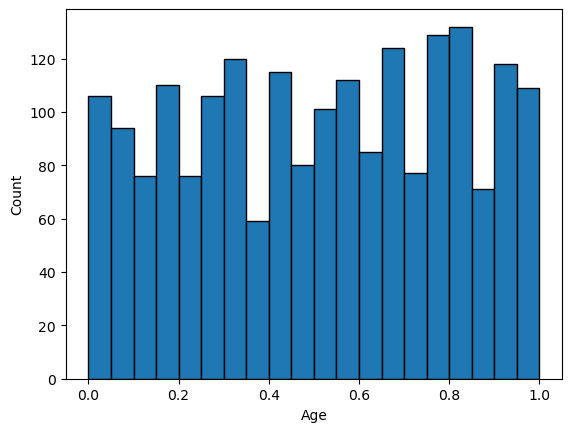

In [66]:
plt.hist(df['Age'],bins=20,edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

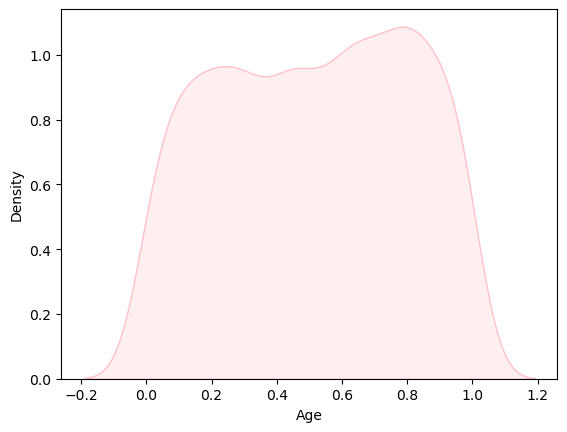

In [70]:
sns.kdeplot(df['Age'],fill=True,color='pink')

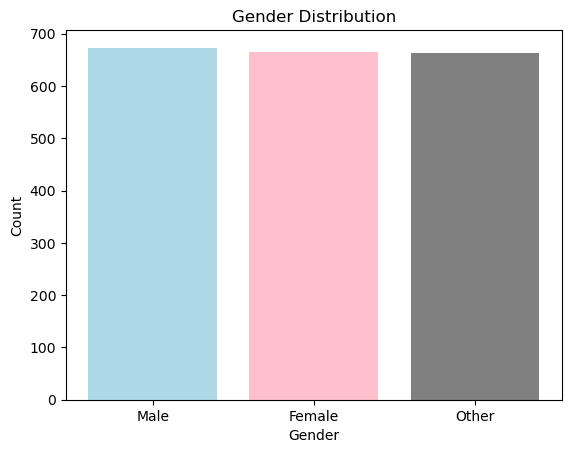

In [41]:
count=df['Gender'].value_counts()
plt.bar(count.index,count.values,color=['lightblue','pink','grey'])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

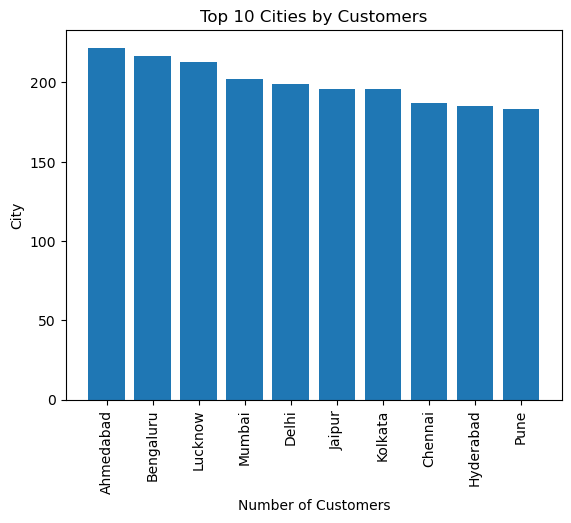

In [96]:
count=df['City'].value_counts().sort_values(ascending=False).head(10)
plt.bar(count.index,count.values)
plt.title("Top 10 Cities by Customers")
plt.xlabel("Number of Customers")
plt.ylabel("City")
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='ProductCategory'>

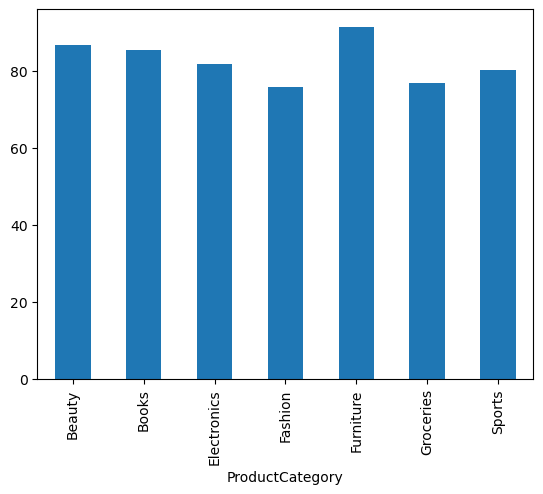

In [65]:
df.groupby('ProductCategory')['TotalAmount'].sum().plot(kind='bar')


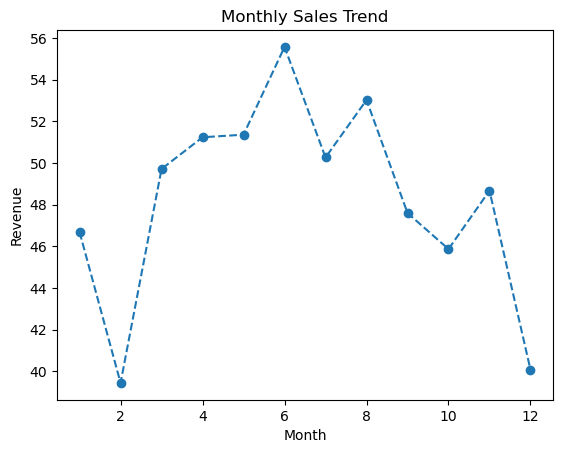

In [85]:
monthly_sales = df.groupby(df['PurchaseMonth'])['TotalAmount'].sum()
plt.plot(monthly_sales.index,monthly_sales.values, marker='o',linestyle='--')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

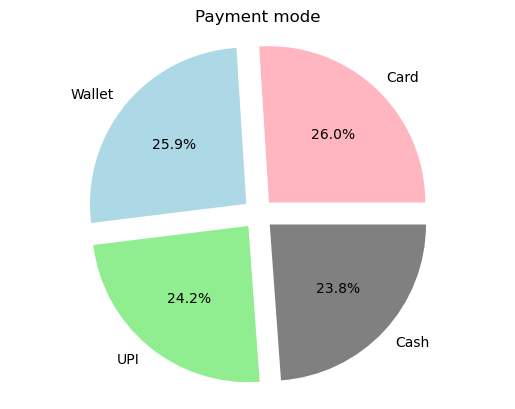

In [107]:
count=df['PaymentMode'].value_counts()
plt.pie(count,labels=count.index,autopct='%1.1f%%',colors=['lightpink','lightblue','lightgreen','grey'],explode=[0.1,0.1,0.1,0.1])
plt.axis("equal")
plt.title("Payment mode")
plt.show()

C:\Users\boomi\AppData\Local\Temp\ipykernel_11852\4241879148.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age=df.groupby('AgeGroup')['TotalAmount'].mean()


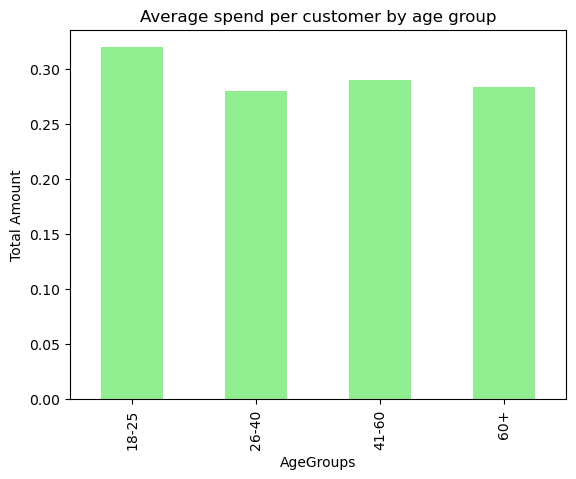

In [93]:
age=df.groupby('AgeGroup')['TotalAmount'].mean()
age.plot(kind='bar',color='lightgreen')
plt.xlabel('AgeGroups')
plt.ylabel('Total Amount')
plt.title('Average spend per customer by age group')
plt.show()

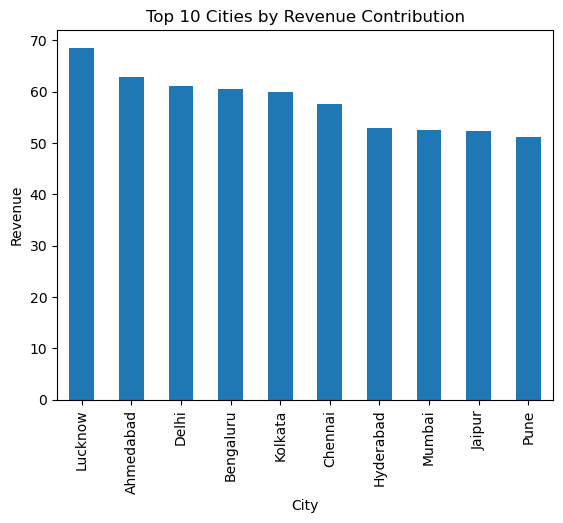

In [94]:
city_revenue = df.groupby('City')['TotalAmount'].sum().sort_values(ascending=False).head(10)
city_revenue.plot(kind='bar')
plt.title("Top 10 Cities by Revenue Contribution")
plt.ylabel("Revenue")
plt.show()

In [97]:
df.columns

Index(['TransactionID', 'CustomerID', 'Gender', 'Age', 'City',
       'ProductCategory', 'Quantity', 'Price', 'PurchaseDate', 'PaymentMode',
       'TotalAmount', 'PurchaseMonth', 'Day_ofweek', 'AgeGroup',
       'Gender_encode', 'City_encode', 'ProductCategory_encode'],
      dtype='object')

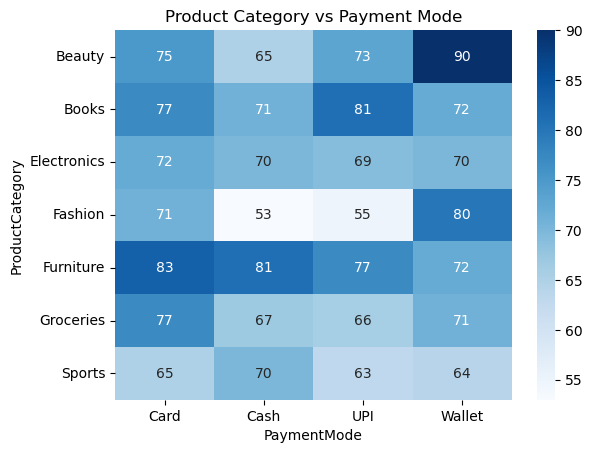

In [109]:
heatmap_data = pd.crosstab(df['ProductCategory'], df['PaymentMode'])
sns.heatmap(heatmap_data, annot=True,cmap="Blues")
plt.title("Product Category vs Payment Mode")
plt.show()

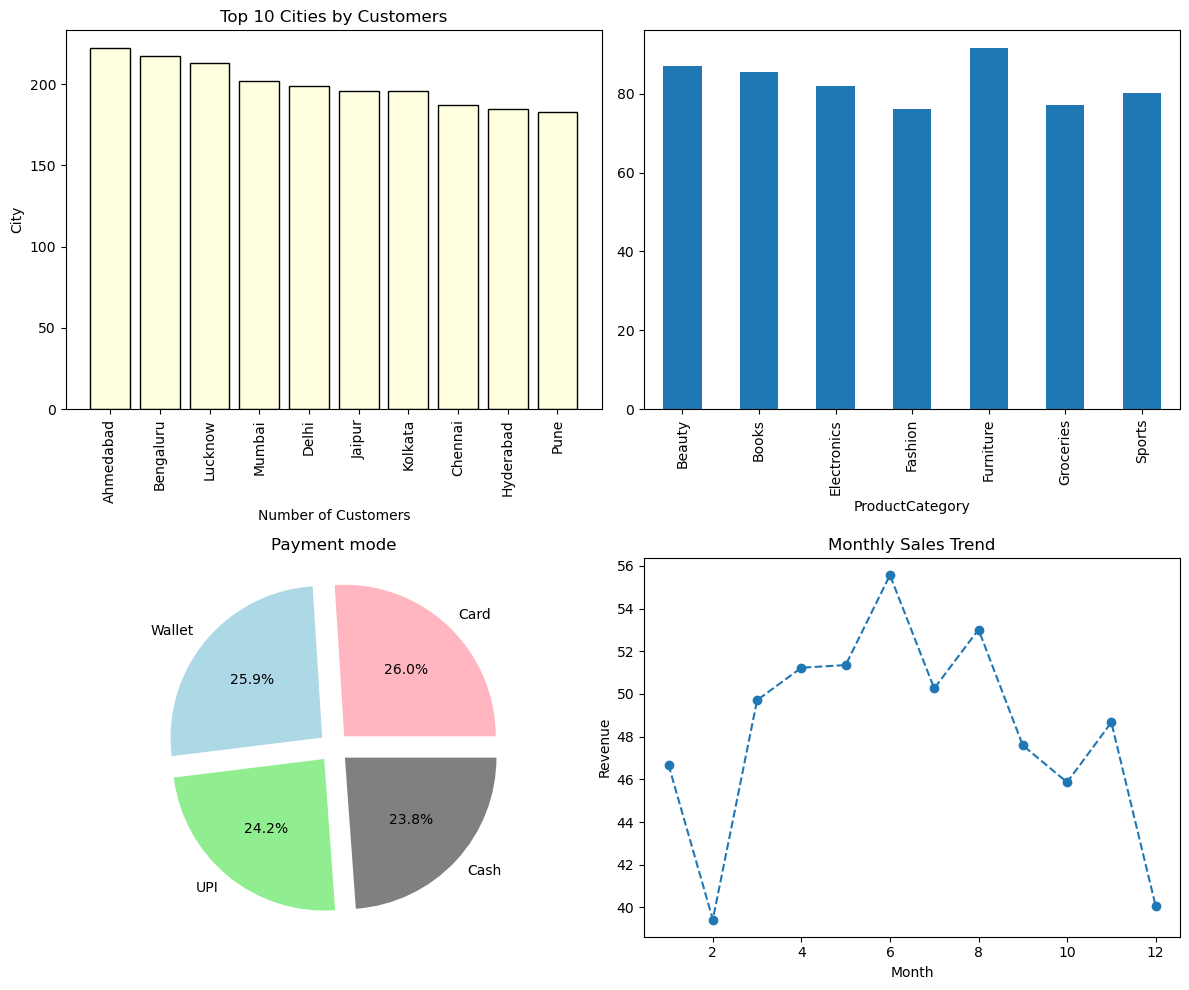

In [122]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
count=df['City'].value_counts().sort_values(ascending=False).head(10)
plt.bar(count.index,count.values,color='lightyellow',edgecolor='black')
plt.title("Top 10 Cities by Customers")
plt.xlabel("Number of Customers")
plt.ylabel("City")
plt.xticks(rotation=90)
plt.subplot(2,2,2)
df.groupby('ProductCategory')['TotalAmount'].sum().plot(kind='bar')
plt.subplot(2,2,3)
count=df['PaymentMode'].value_counts()
plt.pie(count,labels=count.index,autopct='%1.1f%%',colors=['lightpink','lightblue','lightgreen','grey'],explode=[0.1,0.1,0.1,0.1])
plt.title("Payment mode")
plt.subplot(2,2,4)
plt.plot(monthly_sales.index,monthly_sales.values, marker='o',linestyle='--')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()